In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from statsmodels import robust 
import wquantiles

### Problem Statement

 Suppose you are a public school administrator. Some schools in your state of Tennessee are performing below average academically. Your superintendent under pressure from frustrated parents and voters approached you with the task of understanding why these schools are underperforming. To improve school performance, you need to learn more about these schools and their students, just as a business needs to understand its own strengths and weaknesses and its customers. The data includes various demographic, school faculty, and income variables. 
                                             
                                             
##### Objective
  Perform exploratory data analysis which includes determining the type of the data, correlation analysis over the same. You need to convert the data into useful information: Read the data in pandas data frame Describe the data to find more details Find the correlation between ‘reduced_lunch’and‘school_rating  


In [2]:
X=pd.read_csv('middle_tn_schools.csv')
X

,name,school_rating,size,reduced_lunch,state_percentile_16,state_percentile_15,stu_teach_ratio,school_type,avg_score_15,avg_score_16,full_time_teachers,percent_black,percent_white,percent_asian,percent_hispanic
0,Allendale Elementary School,5.0,851.0,10.0,90.2,95.8,15.7,Public,89.4,85.2,54.0,2.9,85.5,1.6,5.6
1,Anderson Elementary,2.0,412.0,71.0,32.8,37.3,12.8,Public,43.0,38.3,32.0,3.9,86.7,1.0,4.9
2,Avoca Elementary,4.0,482.0,43.0,78.4,83.6,16.6,Public,75.7,73.0,29.0,1.0,91.5,1.2,4.4
3,Bailey Middle,0.0,394.0,91.0,1.6,1.0,13.1,Public Magnet,2.1,4.4,30.0,80.7,11.7,2.3,4.3
4,Barfield Elementary,4.0,948.0,26.0,85.3,89.2,14.8,Public,81.3,79.6,64.0,11.8,71.2,7.1,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,Winfree Bryant Middle School,3.0,611.0,57.0,59.1,65.2,16.9,Public,61.4,57.7,36.0,15.2,66.3,1.5,15.7
343,Winstead Elementary School,5.0,515.0,8.0,93.9,97.0,14.3,Public,92.0,89.3,36.0,3.3,87.4,3.1,4.1
344,Woodland Elementary,4.0,424.0,55.0,84.8,76.7,14.1,Public,69.4,79.4,30.0,11.6,70.5,2.1,9.7
345,Woodland Middle School,5.0,866.0,2.0,93.3,97.1,19.2,Public,89.8,84.9,45.0,4.5,77.6,10.0,4.4


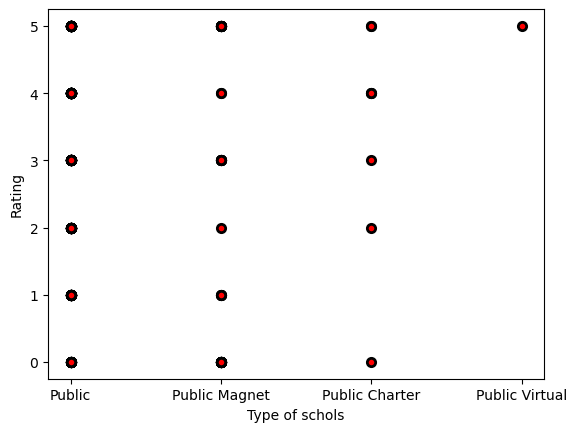

In [3]:
yu=list(X['school_type'])
uy=list(X['school_rating'])

plt.scatter(yu,uy,color='r',edgecolor="black",linewidth=2)
plt.xlabel("Type of schols")
plt.ylabel("Rating")

plt.savefig('plot.png',dpi=200,bbox_inches='tight')

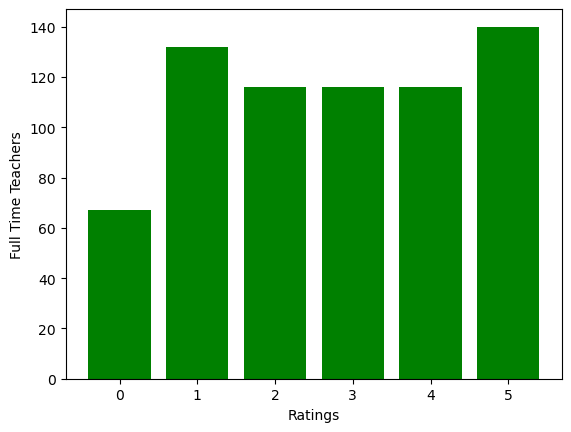

In [4]:
uy=list(X['school_rating'])
tu=list(X['full_time_teachers'])

plt.bar(uy,tu,color='g')
plt.xlabel('Ratings')
plt.ylabel('Full Time Teachers')
plt.savefig('rating')

In [5]:
b=(sum(X['percent_black'])/347)
w=sum(X['percent_white']/347)
s=sum(X['percent_asian']/347)
a=sum(X['percent_hispanic']/347)
print(b,w,s,a)

21.197982708933715 61.6734870317003 2.6426512968299694 11.164553314121045


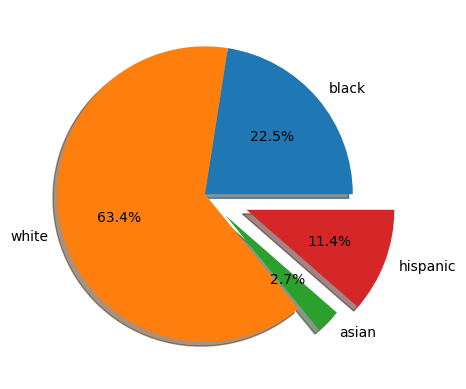

In [6]:
population=[21.9, 61.6 ,2.6, 11.1]
type=['black','white','asian','hispanic']

ex=[0.0,0.0,0.2,0.3]
plt.pie(population,labels=type,explode=ex,autopct="%0.1f%%",shadow=True)


plt.savefig('pie')

In [8]:
X.shape

(347, 15)

In [9]:
Y=X.drop(columns=['name','school_type'])
Y

,school_rating,size,reduced_lunch,state_percentile_16,state_percentile_15,stu_teach_ratio,avg_score_15,avg_score_16,full_time_teachers,percent_black,percent_white,percent_asian,percent_hispanic
0,5.0,851.0,10.0,90.2,95.8,15.7,89.4,85.2,54.0,2.9,85.5,1.6,5.6
1,2.0,412.0,71.0,32.8,37.3,12.8,43.0,38.3,32.0,3.9,86.7,1.0,4.9
2,4.0,482.0,43.0,78.4,83.6,16.6,75.7,73.0,29.0,1.0,91.5,1.2,4.4
3,0.0,394.0,91.0,1.6,1.0,13.1,2.1,4.4,30.0,80.7,11.7,2.3,4.3
4,4.0,948.0,26.0,85.3,89.2,14.8,81.3,79.6,64.0,11.8,71.2,7.1,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,3.0,611.0,57.0,59.1,65.2,16.9,61.4,57.7,36.0,15.2,66.3,1.5,15.7
343,5.0,515.0,8.0,93.9,97.0,14.3,92.0,89.3,36.0,3.3,87.4,3.1,4.1
344,4.0,424.0,55.0,84.8,76.7,14.1,69.4,79.4,30.0,11.6,70.5,2.1,9.7
345,5.0,866.0,2.0,93.3,97.1,19.2,89.8,84.9,45.0,4.5,77.6,10.0,4.4


In [10]:
Z=Y.corr()
Z

,school_rating,size,reduced_lunch,state_percentile_16,state_percentile_15,stu_teach_ratio,avg_score_15,avg_score_16,full_time_teachers,percent_black,percent_white,percent_asian,percent_hispanic
school_rating,1.000000,0.181428,-0.815757,0.985545,0.937817,0.203459,0.941336,0.982390,0.122910,-0.593869,0.639014,0.161469,-0.376288
size,0.181428,1.000000,-0.277807,0.171060,0.162887,0.143173,0.161788,0.143289,0.966880,-0.148405,0.102904,0.193491,-0.017660
reduced_lunch,-0.815757,-0.277807,1.000000,-0.815720,-0.825085,-0.197428,-0.839536,-0.816479,-0.214848,0.562921,-0.668327,-0.226385,0.490446
state_percentile_16,0.985545,0.171060,-0.815720,1.000000,0.949694,0.186893,0.949197,0.994085,0.117061,-0.573810,0.625374,0.151021,-0.383017
state_percentile_15,0.937817,0.162887,-0.825085,0.949694,1.000000,0.141066,0.991847,0.946101,0.109569,-0.564929,0.612183,0.181822,-0.371708
stu_teach_ratio,0.203459,0.143173,-0.197428,0.186893,0.141066,1.000000,0.147963,0.175880,0.019594,-0.122307,0.134595,0.089211,-0.089307
avg_score_15,0.941336,0.161788,-0.839536,0.949197,0.991847,0.147963,1.000000,0.953714,0.105186,-0.595062,0.637500,0.192656,-0.374300
avg_score_16,0.982390,0.143289,-0.816479,0.994085,0.946101,0.175880,0.953714,1.000000,0.089338,-0.592876,0.635201,0.172739,-0.373618
full_time_teachers,0.122910,0.966880,-0.214848,0.117061,0.109569,0.019594,0.105186,0.089338,1.000000,-0.113515,0.055672,0.146726,0.026130
percent_black,-0.593869,-0.148405,0.562921,-0.573810,-0.564929,-0.122307,-0.595062,-0.592876,-0.113515,1.000000,-0.874202,-0.112274,0.086627


<Axes: >

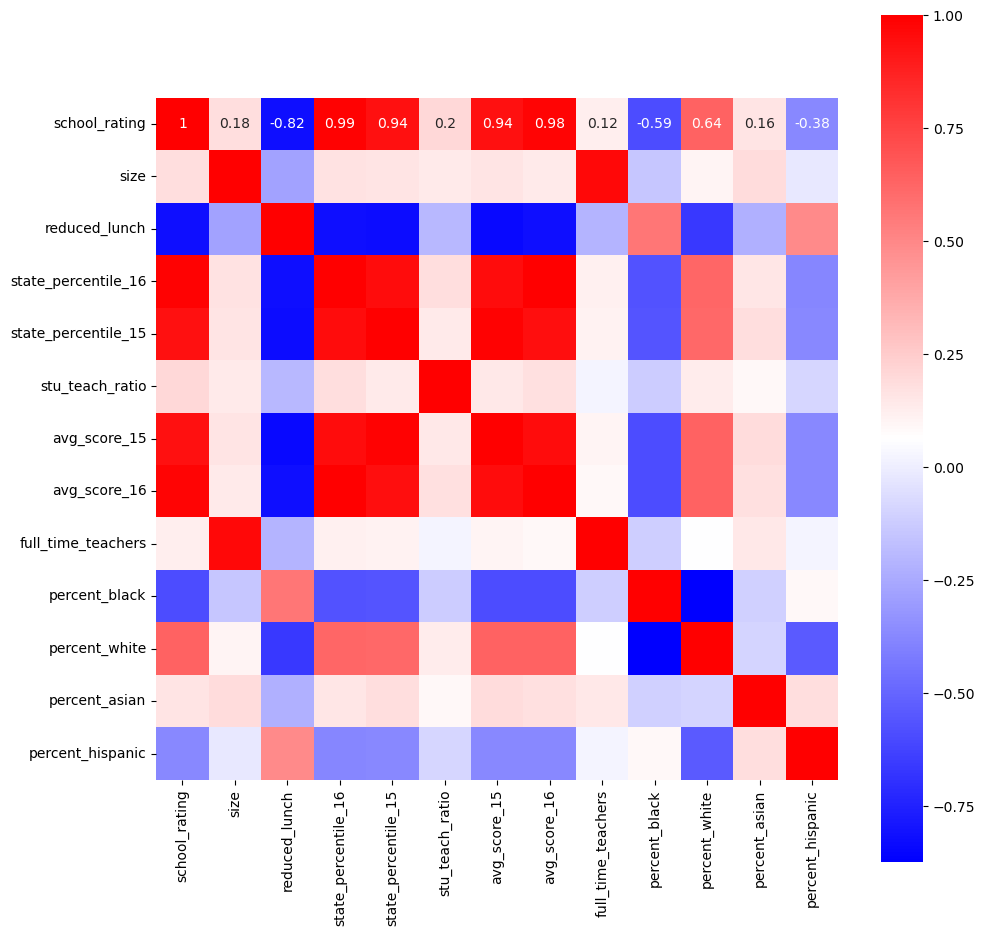

In [11]:
plt.figure(figsize=(11,11))
sns.heatmap(Z,square=True,cmap='bwr',annot=True)

In [14]:
X.groupby('school_type').reduced_lunch.mean()

school_type
Public            48.352740
Public Charter    76.625000
Public Magnet     58.434783
Public Virtual    27.000000
Name: reduced_lunch, dtype: float64

In [29]:
X.groupby('school_type').reduced_lunch.min()

school_type
Public             2.0
Public Charter    55.0
Public Magnet      3.0
Public Virtual    27.0
Name: reduced_lunch, dtype: float64

In [19]:
A=X.groupby('school_type')
A['size'].mean()

school_type
Public            717.027397
Public Charter    368.875000
Public Magnet     655.913043
Public Virtual    222.000000
Name: size, dtype: float64

In [24]:
X[X.school_type=='Public']

,name,school_rating,size,reduced_lunch,state_percentile_16,state_percentile_15,stu_teach_ratio,school_type,avg_score_15,avg_score_16,full_time_teachers,percent_black,percent_white,percent_asian,percent_hispanic
0,Allendale Elementary School,5.0,851.0,10.0,90.2,95.8,15.7,Public,89.4,85.2,54.0,2.9,85.5,1.6,5.6
1,Anderson Elementary,2.0,412.0,71.0,32.8,37.3,12.8,Public,43.0,38.3,32.0,3.9,86.7,1.0,4.9
2,Avoca Elementary,4.0,482.0,43.0,78.4,83.6,16.6,Public,75.7,73.0,29.0,1.0,91.5,1.2,4.4
4,Barfield Elementary,4.0,948.0,26.0,85.3,89.2,14.8,Public,81.3,79.6,64.0,11.8,71.2,7.1,6.0
5,Barkers Mill Elementary School,4.0,893.0,48.0,78.1,76.4,13.9,Public,69.4,72.3,64.0,28.6,39.9,2.2,17.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,Winfree Bryant Middle School,3.0,611.0,57.0,59.1,65.2,16.9,Public,61.4,57.7,36.0,15.2,66.3,1.5,15.7
343,Winstead Elementary School,5.0,515.0,8.0,93.9,97.0,14.3,Public,92.0,89.3,36.0,3.3,87.4,3.1,4.1
344,Woodland Elementary,4.0,424.0,55.0,84.8,76.7,14.1,Public,69.4,79.4,30.0,11.6,70.5,2.1,9.7
345,Woodland Middle School,5.0,866.0,2.0,93.3,97.1,19.2,Public,89.8,84.9,45.0,4.5,77.6,10.0,4.4


In [23]:
X[X.school_type=='Public'].reduced_lunch.mean()

48.352739726027394

In [26]:
X[X.school_type=='Public Magnet'].reduced_lunch.mean()

58.43478260869565

In [27]:
X[X.school_type=='Public Virtual'].reduced_lunch.mean()

27.0

In [28]:
X[X.school_type=='Public Charter'].reduced_lunch.mean()

76.625

In [30]:
X.groupby('school_type').reduced_lunch.agg(['count','min','max','mean'])

,count,min,max,mean
school_type,,,,
Public,292,2.0,98.0,48.352740
Public Charter,8,55.0,90.0,76.625000
Public Magnet,46,3.0,92.0,58.434783
Public Virtual,1,27.0,27.0,27.000000
